The problem is regression using housing data from Boston. The value we are looking to predict is housing prices.

The features in this data set include:

1.   crim – per capita crime rate by town
2.   zn – proportion of residential land zoned for lots over 25,000 sq. ft.
3.   indus – proportion of non-retain business acres per town
4.   chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5.   nox – nitrogen oxides concentration (parts per million)
6.   rm – average number of rooms per dwelling
7.   age – proportion of owner-occupied units built prior to 1940
8.   dis – weighted mean of distances to five Boston employment centers
9.   rad – index of accessibility to radial highways
10.  tax – full-value property-tax rate per 10,000 dollars
11.  ptratio – pupil-teacher ratio by town
12.  b - 1000(Bk — 0.63)^2, where Bk is the proportion of people of African American descent by town
13.  lstat – lower status of the population (percent)
14.  medv – median value of owner-occupied homes in $1000s



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boston_housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Normalizing and standardizing the data 



In [2]:
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(data_norm, columns = df.columns.to_list())
df_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [3]:
features_names = df.columns.to_list()[:-1]
my_lr = LinearRegression()
X = df_norm[features_names]
Y = df_norm['MEDV']
my_lr.fit(X, Y)

LinearRegression()

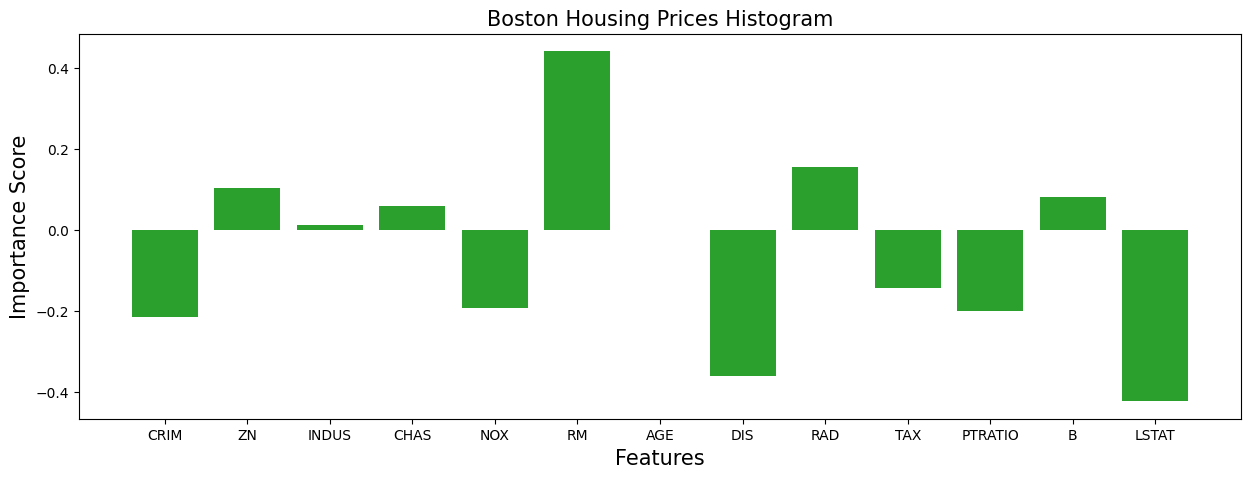

In [4]:
summary = pd.DataFrame({'Features':features_names, 'Scores':my_lr.coef_})
plt.figure(figsize = (15, 5))
plt.bar(x = summary['Features'], height = summary['Scores'] , color = 'Tab:green') 
plt.title('Boston Housing Prices Histogram', fontsize = 15)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Importance Score', fontsize = 15)
plt.show()

AGE and INDUS are removed due to low importance score and model is trained 




In [6]:
features_names = df.loc[:, ~df.columns.isin(['INDUS', 'AGE', 'MEDV'])].columns.to_list()
X = df[features_names]
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
my_lr.fit(X_train, Y_train)
pred = my_lr.predict(X_test)
print('The model''s r2 score is: {}'.format(my_lr.score(X_train, Y_train)))

The models r2 score is: 0.7870719362118345


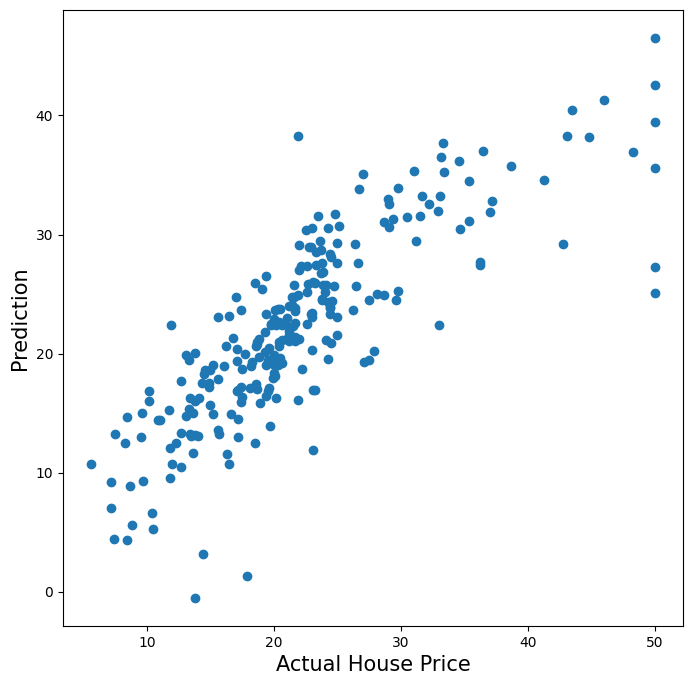

In [7]:
plt.figure(figsize = (8, 8))
plt.scatter(x = Y_test, y = pred)
plt.xlabel('Actual House Price', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

In [8]:
print('The intercept (b_0) is  {}'.format(my_lr.intercept_))
for i in range(len(features_names)):
  print('The coef (b_{}) is  {}'.format(i+1, my_lr.coef_[i]))

The intercept (b_0) is  40.96330995651185
The coef (b_1) is  -0.12377922347798463
The coef (b_2) is  0.0561569894860314
The coef (b_3) is  3.516737077802467
The coef (b_4) is  -15.614620699199666
The coef (b_5) is  3.538264321879047
The coef (b_6) is  -1.5842072742339974
The coef (b_7) is  0.22409848118943967
The coef (b_8) is  -0.007464499098094254
The coef (b_9) is  -1.1019331083231043
The coef (b_10) is  0.006703450095596281
The coef (b_11) is  -0.5898836443547094


In [10]:
def MAPE(Y, pred):
  l1 = list(Y)
  l2 = list(pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('MAPE:', MAPE(Y_test, pred)*100, "%")

Mean Absolute Error: 3.629079679705506
Mean Squared Error: 25.165060204107064
Root Mean Squared Error: 5.016478865111171
MAPE: 18.208255119488808 %


In conclusion, the predicted prices of houses appear to increase linearly and the model used for the prediction has an r-squared value of .78 meaning that 78 percent of the variability is explained by the model. Furthermore, the MAPE score indicates that the accuracy is somewhat low, but it is acceptable.